<a href="https://colab.research.google.com/github/aulphin/DDS-ML-/blob/main/DDS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [ ]:
labels = os.listdir('/content/drive/My Drive/Project-1/Drowsiness/dataset/train')

In [ ]:
#By using method ,indexing images as yawn or no-yawn to 0 or 1
def face_for_yawn(direc="/content/drive/My Drive/Project-1/Drowsiness/dataset/train", face_cas_path="/content/drive/My Drive/Project-1/Drowsiness/mcsc/frontal.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [ ]:
def get_data(dir_path="/content/drive/My Drive/Project-1/Drowsiness/dataset/train/", face_cas="/content/drive/My Drive/Project-1/Drowsiness/mcsc/frontal.xml", eye_cas="/content/drive/My Drive/Project-1/Drowsiness/mcsc/eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


In [ ]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [ ]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
print(X)
print(y)


In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)
#print(X)

In [ ]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
#print(y)

In [ ]:
y = np.array(y)
#print(y)

In [ ]:
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
#print(len(train_generator))
#print(len(test_generator))


36
16


In [ ]:
model = Sequential()
#############################################
model.add(Conv2D(512, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
####################################################
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))#output layer

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
#print(len('accuracy'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/10
36/36 [==============================] - 47s 824ms/step - loss: 1.3373 - accuracy: 0.3765 - val_loss: 1.2696 - val_accuracy: 0.4393
Epoch 2/10
36/36 [==============================] - 19s 536ms/step - loss: 1.2596 - accuracy: 0.3852 - val_loss: 1.0968 - val_accuracy: 0.4717
Epoch 3/10
36/36 [==============================] - 17s 478ms/step - loss: 1.0419 - accuracy: 0.5939 - val_loss: 0.6657 - val_accuracy: 0.6781
Epoch 4/10
36/36 [==============================] - 17s 479ms/step - loss: 0.6434 - accuracy: 0.7539 - val_loss: 0.4439 - val_accuracy: 0.8057
Epoch 5/10
36/36 [==============================] - 17s 479ms/step - loss: 0.5454 - accuracy: 0.7809 - val_loss: 0.3019 - val_accuracy: 0.8826
Epoch 6/10
36/36 [==============================] - 18s 496ms/step - loss: 0.4531 - accuracy: 0.8139 - val_loss: 0.2744 - val_accuracy: 0.8846
Epoch 7/10
36/36 [==============================] - 18s 502ms/step - loss: 0.4127 - accuracy: 0.8365 - val_loss: 0.2054 - val_accuracy: 0.9352

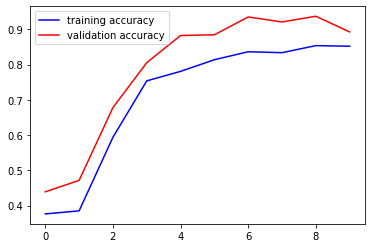

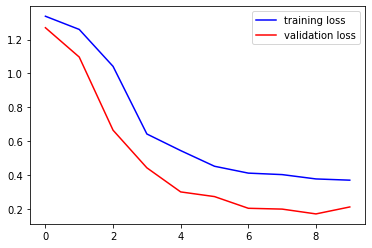

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()



In [ ]:
model.save("d.h5")

In [ ]:
model.save("d.model")

INFO:tensorflow:Assets written to: d.model/assets


In [ ]:
prediction = np.argmax(model.predict(X_test),axis=1)

In [ ]:
print(prediction)

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.51      0.91      0.65        53
     no_yawn       0.71      0.52      0.60        66
      Closed       0.86      0.80      0.83       181
        Open       0.91      0.86      0.89       194

    accuracy                           0.80       494
   macro avg       0.75      0.77      0.74       494
weighted avg       0.82      0.80      0.80       494



In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath): # filepath is a variable to pass a image during prediction time
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model('d.h5')

In [ ]:
file = "/content/drive/My Drive/Project-1/Images/1.jpg"
plt.imshow(plt.imread(file))

prediction = model.predict([prepare(file)])

print(labels_new[np.argmax(prediction)],np.argmax(prediction)) # here labels_new is a list ,which is used to give label on the basis of indexing